In [384]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import string

# Data Analysis on Amazon Purchases
+ from 31-Dec-2016_to_08-Oct-2019 on the gmail account
+ from 01-Jan-2013_to_08-Oct-2019 on the yahoo account

## Data Prepocessing 

In [542]:
gmail_df = pd.read_csv("data/amazonhistory_gmail.csv")
yahoo_df = pd.read_csv("data/amazonhistory_yahoo.csv")

In [543]:
df = gmail_df.append(yahoo_df)

In [544]:
df.columns

Index(['Order Date', 'Order ID', 'Title', 'Category', 'ASIN/ISBN',
       'UNSPSC Code', 'Website', 'Release Date', 'Condition', 'Seller',
       'Seller Credentials', 'List Price Per Unit', 'Purchase Price Per Unit',
       'Quantity', 'Payment Instrument Type', 'Purchase Order Number',
       'PO Line Number', 'Ordering Customer Email', 'Shipment Date',
       'Shipping Address Name', 'Shipping Address Street 1',
       'Shipping Address Street 2', 'Shipping Address City',
       'Shipping Address State', 'Shipping Address Zip', 'Order Status',
       'Carrier Name & Tracking Number', 'Item Subtotal', 'Item Subtotal Tax',
       'Item Total', 'Tax Exemption Applied', 'Tax Exemption Type',
       'Exemption Opt-Out', 'Buyer Name', 'Currency', 'Group Name'],
      dtype='object')

In [545]:
# df.columns[i] --> the column names
# df[df.columns[i]].unique() --> the unique values in each columns
# Keep a list of all the columns that only have one unique value.
remove_lst = [[df.columns[i],df[df.columns[i]].unique()] for i in range(df.shape[1]) 
              if len(df[df.columns[i]].unique()) == 1]
# Get all the columns names to be remove
remove_lst = [remove_lst[i][0] for i in range(len(remove_lst))]
df = df.drop(remove_lst, axis=1)
df.shape

(449, 29)

In [546]:
df.head(2)

,Order Date,Order ID,Title,Category,ASIN/ISBN,UNSPSC Code,Release Date,Condition,Seller,Seller Credentials,...,Shipping Address City,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Exemption Opt-Out,Buyer Name
0,01/22/17,104-0813381-8012232,Gillette Fusion ProGlide Power Men's Razor wit...,Health and Beauty,B00J3MPS4E,50500000.0,NaN,new,Amazon.com,NaN,...,BURLINGTON,27215-7731,Shipped,USPS(9200199999978703329438),$11.34,$0.73,$12.07,NaN,NaN,Thien
1,02/15/17,111-4530030-9275427,Generic VHEM Fidget1 Cube Relieves Stress & An...,NaN,B01N3UN0QE,NaN,NaN,new,Keith Smith Case,NaN,...,GREENSBORO,27413,Shipped,EUB(LT839717071CN),$6.59,$0.00,$6.59,NaN,NaN,Thien


In [547]:
# Clean out the columns space
df.columns = df.columns.str.replace(" ","_")

In [548]:
# Convert the order_date into date data type
df["date"] = pd.to_datetime(df.Order_Date)

In [549]:
df.Title = df.Title.apply(lambda x: x.translate(string.punctuation))
df.Title = df.Title.apply(lambda x: x.lower())

In [550]:
# Method that strip away the dollar sign and cast float datatype on each columns
def num_conversion(df,lst):
    for i in lst:
        df[i] =  [x[1:] for x in df[i]]
        df[i] = df[i].astype(float)

In [551]:
# get the column names that need to be float values.
num_cols = df.iloc[:,df.columns.str.contains("total", case=False)].columns
num_cols = num_cols.append(df.iloc[:,df.columns.str.contains("price", case=False)].columns)
num_conversion(df,num_cols)

In [552]:
df.columns

Index(['Order_Date', 'Order_ID', 'Title', 'Category', 'ASIN/ISBN',
       'UNSPSC_Code', 'Release_Date', 'Condition', 'Seller',
       'Seller_Credentials', 'List_Price_Per_Unit', 'Purchase_Price_Per_Unit',
       'Quantity', 'Payment_Instrument_Type', 'Ordering_Customer_Email',
       'Shipment_Date', 'Shipping_Address_Name', 'Shipping_Address_Street_1',
       'Shipping_Address_Street_2', 'Shipping_Address_City',
       'Shipping_Address_Zip', 'Order_Status',
       'Carrier_Name_&_Tracking_Number', 'Item_Subtotal', 'Item_Subtotal_Tax',
       'Item_Total', 'Tax_Exemption_Applied', 'Exemption_Opt-Out',
       'Buyer_Name', 'date'],
      dtype='object')

In [559]:
df.describe()

,UNSPSC_Code,List_Price_Per_Unit,Purchase_Price_Per_Unit,Quantity,Item_Subtotal,Item_Subtotal_Tax,Item_Total
count,4.030000e+02,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,4.830824e+07,52.363385,26.979087,1.048998,27.679421,0.516793,28.196214
std,8.961879e+06,162.955920,40.176954,0.294753,40.326205,1.664941,41.113669
min,1.011000e+07,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,4.321000e+07,0.000000,8.750000,1.000000,8.880000,0.000000,8.950000
50%,5.214000e+07,14.290000,14.400000,1.000000,14.990000,0.000000,15.640000
75%,5.313160e+07,39.990000,28.950000,1.000000,29.950000,0.000000,29.990000
max,8.515000e+07,2495.000000,437.490000,4.000000,437.490000,18.220000,437.490000


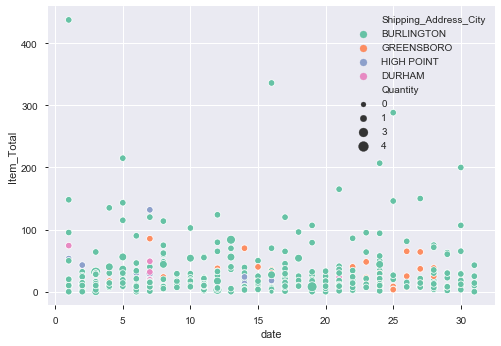

In [553]:
sns.scatterplot(df.date.dt.day,df.Item_Total, hue=df.Shipping_Address_City, size= df.Quantity,
                palette="Set2")
plt.show()

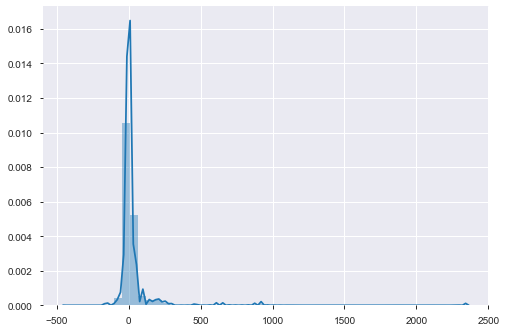

In [554]:
sns.distplot(df.List_Price_Per_Unit - df.Purchase_Price_Per_Unit)
plt.show()

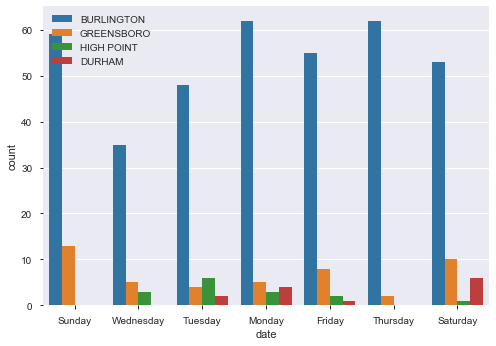

In [555]:
sns.countplot(df.date.dt.weekday_name, hue=df.Shipping_Address_City)
plt.legend(loc='upper left')
plt.show()

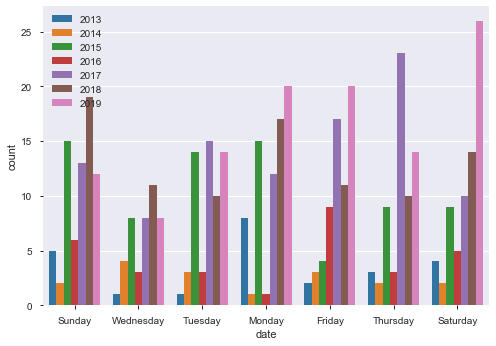

In [556]:
sns.countplot(df.date.dt.weekday_name, hue=df.date.dt.year)
plt.legend(loc='upper left')
plt.show()

In [557]:
dict(df.date.dt.year.value_counts())

{2013: 24, 2014: 17, 2015: 74, 2016: 30, 2017: 98, 2018: 92, 2019: 114}